In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [32]:
from skitracker_utils import save_gpx_run
from skitracker_utils import save_json_run
#from skitracker_utils import 

In [33]:
%matplotlib inline

In [34]:
sns.set()

In [114]:
name = 'ross'
date = datetime(2019,3,18)
filename = '{}_{}.pkl'.format(name,date.strftime('%d%b%y'))
filename

'ross_18Mar19.pkl'

In [115]:
data = pd.read_pickle('processed_data/'+filename)


In [116]:
data.reset_index(drop=True,inplace=True)

In [117]:
data['gps_alt_roll']=data.GPS_Alt.rolling(400).mean()

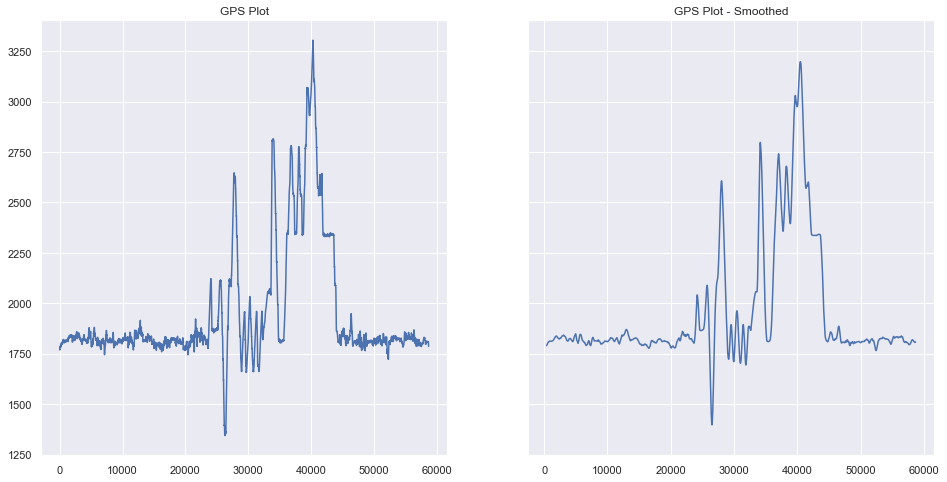

In [118]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,8))
data.GPS_Alt.plot(ax=ax1,title='GPS Plot')
data.gps_alt_roll.plot(ax=ax2,title='GPS Plot - Smoothed')


In [119]:
data['gps_alt_roll_delta'] = data.gps_alt_roll[:-1] - data.gps_alt_roll[1:].values
data['gps_alt_raw_delta'] = data.GPS_Alt[:-1] - data.GPS_Alt[1:].values

In [120]:

data['gps_alt_raw_delta_roll'] =data.gps_alt_raw_delta.rolling(180).mean()
data['gps_alt_roll_delta_roll'] =data.gps_alt_roll_delta.rolling(180).mean()

In [121]:
signs = np.sign(data.gps_alt_raw_delta_roll.fillna(0))
signchange = ((np.roll(signs, 1) - signs) != 0).astype(int)

In [122]:
sign_changes_idx = signchange.index[signchange == 1].tolist()

In [123]:
routes_list=[]
for i in range(len(sign_changes_idx)-1):
    #print(sign_changes_idx[i],sign_changes_idx[i+1]-1, signs[sign_changes_idx[i]])
    start = sign_changes_idx[i]
    end = sign_changes_idx[i+1]-1
    sign = signs[sign_changes_idx[i]]
    max_val = np.max(data.loc[start:end,('gps_alt_raw_delta_roll')])
    routes_list.append((start,end,sign,max_val ))
    
routes = pd.DataFrame(routes_list,columns=['start_idx','end_idx','sign','peak'])
routes.head()

,start_idx,end_idx,sign,peak
0,179,429,-1.0,-0.001111
1,430,448,1.0,0.011111
2,449,482,-1.0,-0.000556
3,483,492,1.0,0.007222
4,493,696,-1.0,-0.000556


In [124]:
peak_filter = 0.5
runs = routes[(routes.sign== 1) & (routes.peak >= peak_filter)].copy()
runs.reset_index(inplace=True)
num_runs = runs.shape[0]
num_runs

16

In [125]:
save_gpx_run(data,runs,name, date)

ross_18Mar19_runs.xml


In [126]:
save_json_run(data,runs,name, date)

ross_18Mar19_0.json
ross_18Mar19_1.json
ross_18Mar19_2.json
ross_18Mar19_3.json
ross_18Mar19_4.json
ross_18Mar19_5.json
ross_18Mar19_6.json
ross_18Mar19_7.json
ross_18Mar19_8.json
ross_18Mar19_9.json
ross_18Mar19_10.json
ross_18Mar19_11.json
ross_18Mar19_12.json
ross_18Mar19_13.json
ross_18Mar19_14.json
ross_18Mar19_15.json
